### First lets check out what the vgg19 saved file looks like:

In [1]:
import scipy.io
vgg = scipy.io.loadmat('../input/imagenet-vgg-verydeep-19.mat')

In [2]:
vgg['layers'] # 1x43 matrix, each column is a layer

array([[ array([[ (array([[ array([[[[ 0.39416704, -0.08419707, -0.03631314, ..., -0.10720515,
          -0.03804016,  0.04690642],
         [ 0.46418372,  0.03355668,  0.10245045, ..., -0.06945956,
          -0.04020201,  0.04048637],
         [ 0.34119523,  0.09563112,  0.0177449 , ..., -0.11436455,
          -0.05099866, -0.00299793]],

        [[ 0.37740308, -0.07876257, -0.04775979, ..., -0.11827433,
          -0.19008617, -0.01889699],
         [ 0.41810837,  0.05260524,  0.09755926, ..., -0.09385028,
          -0.20492788, -0.0573062 ],
         [ 0.33999205,  0.13363543,  0.02129423, ..., -0.13025227,
          -0.16508926, -0.06969624]],

        [[-0.04594866, -0.11583115, -0.14462094, ..., -0.12290562,
          -0.35782176, -0.27979308],
         [-0.04806903, -0.00658076, -0.02234544, ..., -0.0878844 ,
          -0.3915486 , -0.34632796],
         [-0.04484424,  0.06471398, -0.07631404, ..., -0.12629718,
          -0.29905206, -0.28253639]]],


       [[[ 0.2671299 , -0.07

In [3]:
layers = vgg['layers'][0]

In [4]:
layers[5][0][0][0][0][0] # weights for the 5th column out of the 43

array([[[[ -2.40122317e-03,   3.45619358e-02,   1.28371455e-02, ...,
           -7.11448789e-02,   2.60643456e-02,  -3.80778611e-02],
         [ -4.24218457e-03,  -2.70704972e-03,  -2.62416936e-02, ...,
           -7.89890438e-03,   2.88206208e-02,  -1.25857424e-02],
         [ -4.92411293e-03,  -3.80098494e-03,  -1.94974169e-02, ...,
            1.00596230e-02,  -3.80819896e-03,  -1.27934683e-02],
         ..., 
         [  1.17722456e-03,   2.03850656e-03,  -1.84664298e-02, ...,
           -5.58818597e-03,   1.08670723e-02,  -4.87518450e-03],
         [ -1.66441165e-02,   9.69805568e-03,   3.09586413e-02, ...,
            9.27918591e-03,  -2.98406668e-02,  -2.92706024e-02],
         [ -3.02663469e-03,   8.75900127e-03,   9.57242958e-03, ...,
           -1.10846879e-02,  -5.07565215e-03,  -5.72996065e-02]],

        [[ -7.88936578e-03,   3.87736633e-02,   3.36136785e-03, ...,
           -5.37590683e-02,   3.91219482e-02,   4.02031168e-02],
         [  3.19326809e-03,   2.70831306e-03,

In [5]:
layers[5][0][0][0][0][1] # baises

array([[-0.04264871,  0.07903407, -0.0259495 ,  0.09956805,  0.11347435,
         0.22296953,  0.16254444,  0.24153827,  0.2169417 ,  0.14134893,
         0.01776232,  0.14760557,  0.01020021,  0.00331076,  0.25435841,
         0.23834747,  0.24815115,  0.26349816,  0.26591918,  0.24681608,
         0.21378395,  0.17721638, -0.0080344 ,  0.04478951,  0.34360391,
         0.21534178,  0.12471174,  0.01299066,  0.01572731,  0.06397174,
         0.2874943 , -0.07213273,  0.12200902,  0.19028564, -0.07094853,
        -0.08985633,  0.13568568,  0.2078412 ,  0.01877796, -0.01225951,
        -0.0133676 ,  0.28808182,  0.10550263,  0.00673345,  0.26812926,
         0.25511721,  0.26528743,  0.12609974,  0.28991956, -0.04549757,
        -0.03101785,  0.04950628,  0.11521172, -0.08416642,  0.12860906,
         0.23043001,  0.06403093,  0.11174697,  0.11361445,  0.00913248,
        -0.09716944,  0.2296515 ,  0.08486108,  0.06781235,  0.17906663,
         0.07938392,  0.24897315, -0.06160254,  0.0

In [6]:
# printing all layer names
for i in range(43):
    print (i, ' : ', layers[i][0][0][-2][0])

0  :  conv1_1
1  :  relu
2  :  conv1_2
3  :  relu
4  :  max
5  :  conv2_1
6  :  relu
7  :  conv2_2
8  :  relu
9  :  max
10  :  conv3_1
11  :  relu
12  :  conv3_2
13  :  relu
14  :  conv3_3
15  :  relu
16  :  conv3_4
17  :  relu
18  :  max
19  :  conv4_1
20  :  relu
21  :  conv4_2
22  :  relu
23  :  conv4_3
24  :  relu
25  :  conv4_4
26  :  relu
27  :  max
28  :  conv5_1
29  :  relu
30  :  conv5_2
31  :  relu
32  :  conv5_3
33  :  relu
34  :  conv5_4
35  :  relu
36  :  max
37  :  fc6
38  :  relu
39  :  fc7
40  :  relu
41  :  fc8
42  :  softmax


In [7]:
# A function that returns the weights in a layer and checks if the layer name is correct
def _weights(layer, expected_layer_name):
        W = layers[layer][0][0][0][0][0]
        b = layers[layer][0][0][0][0][1]
        layer_name = layers[layer][0][0][-2][0]
        assert layer_name == expected_layer_name
        return W, b

In [8]:
_weights(14, 'conv3_3')

(array([[[[ -1.98240756e-04,   8.21193028e-03,   4.93471557e-03, ...,
             7.96714984e-03,  -2.35612504e-02,   9.29893646e-03],
          [  1.21108685e-02,  -4.23833821e-03,  -1.05499756e-02, ...,
             6.20815950e-03,  -7.11182179e-03,   5.24743041e-03],
          [ -2.05195621e-02,  -4.43841843e-03,   6.78775739e-03, ...,
            -9.11276229e-03,  -2.10612360e-03,   1.00116534e-02],
          ..., 
          [  1.44951167e-02,  -1.26330869e-03,   1.70700643e-02, ...,
             3.27371783e-03,   4.64524142e-03,  -9.50877648e-03],
          [ -5.65596391e-03,   9.08120628e-03,  -1.63657255e-02, ...,
             1.04493527e-02,   5.07268729e-03,   6.83819177e-03],
          [  2.99810735e-03,  -4.11615800e-03,   5.41779818e-03, ...,
            -7.95660075e-03,  -5.52953104e-04,   1.76814888e-02]],
 
         [[  1.53240887e-03,  -2.98397313e-03,   6.99213380e-03, ...,
             6.03344617e-03,  -3.24347429e-02,   2.11601937e-03],
          [  2.67746504e-02, 

### Here we will make our layers from the weights given

In [9]:
# Making functions that will make layers from those weights from vgg19
import tensorflow as tf

def _conv2d_relu(prev_layer, layer, layer_name):
        W, b = _weights(layer, layer_name)
        W = tf.constant(W)
        b = tf.constant(np.reshape(b, (b.size)))
        conv = tf.nn.conv2d(prev_layer, filter=W, strides=[1, 1, 1, 1], padding='SAME') + b
        return tf.nn.relu(conv)

def _avgpool(prev_layer):
        return tf.nn.avg_pool(prev_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#### We are taking a fixed size of images for simplicity sake

In [10]:
# Making a graph
import numpy as np
IMAGE_HEIGHT = 600
IMAGE_WIDTH = 800
COLOR_CHANNELS = 3

graph = {}
graph['input']   = tf.Variable(np.zeros((1, IMAGE_HEIGHT, IMAGE_WIDTH, COLOR_CHANNELS)), dtype = 'float32')
graph['conv1_1']  = _conv2d_relu(graph['input'], 0, 'conv1_1')
graph['conv1_2']  = _conv2d_relu(graph['conv1_1'], 2, 'conv1_2')
graph['avgpool1'] = _avgpool(graph['conv1_2'])
graph['conv2_1']  = _conv2d_relu(graph['avgpool1'], 5, 'conv2_1')
graph['conv2_2']  = _conv2d_relu(graph['conv2_1'], 7, 'conv2_2')
graph['avgpool2'] = _avgpool(graph['conv2_2'])
graph['conv3_1']  = _conv2d_relu(graph['avgpool2'], 10, 'conv3_1')
graph['conv3_2']  = _conv2d_relu(graph['conv3_1'], 12, 'conv3_2')
graph['conv3_3']  = _conv2d_relu(graph['conv3_2'], 14, 'conv3_3')
graph['conv3_4']  = _conv2d_relu(graph['conv3_3'], 16, 'conv3_4')
graph['avgpool3'] = _avgpool(graph['conv3_4'])
graph['conv4_1']  = _conv2d_relu(graph['avgpool3'], 19, 'conv4_1')
graph['conv4_2']  = _conv2d_relu(graph['conv4_1'], 21, 'conv4_2')
graph['conv4_3']  = _conv2d_relu(graph['conv4_2'], 23, 'conv4_3')
graph['conv4_4']  = _conv2d_relu(graph['conv4_3'], 25, 'conv4_4')
graph['avgpool4'] = _avgpool(graph['conv4_4'])
graph['conv5_1']  = _conv2d_relu(graph['avgpool4'], 28, 'conv5_1')
graph['conv5_2']  = _conv2d_relu(graph['conv5_1'], 30, 'conv5_2')
graph['conv5_3']  = _conv2d_relu(graph['conv5_2'], 32, 'conv5_3')
graph['conv5_4']  = _conv2d_relu(graph['conv5_3'], 34, 'conv5_4')
graph['avgpool5'] = _avgpool(graph['conv5_4'])

In [11]:
graph

{'avgpool1': <tf.Tensor 'AvgPool:0' shape=(1, 300, 400, 64) dtype=float32>,
 'avgpool2': <tf.Tensor 'AvgPool_1:0' shape=(1, 150, 200, 128) dtype=float32>,
 'avgpool3': <tf.Tensor 'AvgPool_2:0' shape=(1, 75, 100, 256) dtype=float32>,
 'avgpool4': <tf.Tensor 'AvgPool_3:0' shape=(1, 38, 50, 512) dtype=float32>,
 'avgpool5': <tf.Tensor 'AvgPool_4:0' shape=(1, 19, 25, 512) dtype=float32>,
 'conv1_1': <tf.Tensor 'Relu:0' shape=(1, 600, 800, 64) dtype=float32>,
 'conv1_2': <tf.Tensor 'Relu_1:0' shape=(1, 600, 800, 64) dtype=float32>,
 'conv2_1': <tf.Tensor 'Relu_2:0' shape=(1, 300, 400, 128) dtype=float32>,
 'conv2_2': <tf.Tensor 'Relu_3:0' shape=(1, 300, 400, 128) dtype=float32>,
 'conv3_1': <tf.Tensor 'Relu_4:0' shape=(1, 150, 200, 256) dtype=float32>,
 'conv3_2': <tf.Tensor 'Relu_5:0' shape=(1, 150, 200, 256) dtype=float32>,
 'conv3_3': <tf.Tensor 'Relu_6:0' shape=(1, 150, 200, 256) dtype=float32>,
 'conv3_4': <tf.Tensor 'Relu_7:0' shape=(1, 150, 200, 256) dtype=float32>,
 'conv4_1': <tf.T

### Defining the content loss

We are considering only layer-21 for content loss

In [12]:
# Define content loss function
def content_loss_func(sess, model):
        x = sess.run(model['conv4_2'])
        p = model['conv4_2']     
        return tf.reduce_sum(tf.pow(x - p, 2))

### Defining the style loss

We are considering layers 0, 5, 10, 19, 28 for style losses

In [13]:
# Define style loss function

# Each layer has a style weight that defines how much value to give to each layer's style
STYLE_LAYERS = [
    ('conv1_1', 0.5),
    ('conv2_1', 1.0),
    ('conv3_1', 1.5),
    ('conv4_1', 3.0),
    ('conv5_1', 4.0),
]

def style_loss_func(sess, model):
    def _gram_matrix(F, N, M):
        Ft = tf.reshape(F, (M, N))
        return tf.matmul(tf.transpose(Ft), Ft)

    def _style_loss(a, x):
        # N is the number of filters (at layer l).
        N = a.shape[3]
        # M is the height times the width of the feature map (at layer l).
        M = a.shape[1] * a.shape[2]
        # A is the style representation of the original image (at layer l).
        A = _gram_matrix(a, N, M)
        # G is the style representation of the generated image (at layer l).
        G = _gram_matrix(x, N, M)
        return tf.reduce_sum(tf.pow(G - A, 2))

    E = [_style_loss(sess.run(model[layer_name]), model[layer_name]) for layer_name, _ in STYLE_LAYERS]
    W = [w for _, w in STYLE_LAYERS]
    loss = sum([W[l] * E[l] for l in range(len(STYLE_LAYERS))])
    return loss

The MEAN_VALUES array was used to train vgg19, any change in those values will have a negative effect on the result

In [14]:
#Defining some helper functions

import scipy.misc
MEAN_VALUES = np.array([123.68, 116.779, 103.939]).reshape((1,1,1,3))

def generate_noise_image(content_image, noise_ratio = 0.6):
    noise_image = np.random.uniform(
            -20, 20,
            (1, IMAGE_HEIGHT, IMAGE_WIDTH, COLOR_CHANNELS)).astype('float32')
    output_image = noise_image * noise_ratio + content_image * (1 - noise_ratio)
    return output_image

def load_image(path):
    image = scipy.misc.imread(path)
    image = np.reshape(image, ((1,) + image.shape))
    image = image - MEAN_VALUES
    return image

def save_image(path, image):
    image = image + MEAN_VALUES
    image = image[0]
    image = np.clip(image, 0, 255).astype('uint8')
    scipy.misc.imsave(path, image)

In [15]:
content_image = load_image('./content.jpg')
style_image = load_image('./style.jpg')
output_image = generate_noise_image(content_image)

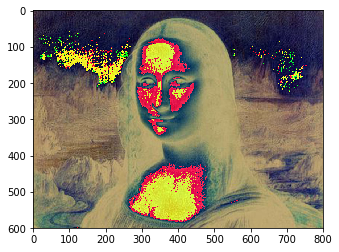

In [16]:
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(content_image[0])

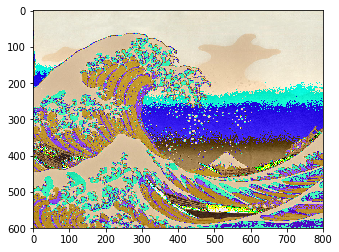

In [17]:
imshow(style_image[0])

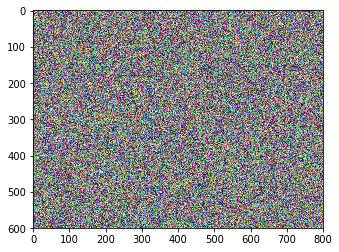

In [18]:
imshow(output_image[0])

### Initialize the tensorflow session

In [19]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

Send content image to the graph and initialize the content loss

Send style image to the graph and initialize the style loss

In [20]:
sess.run(graph['input'].assign(content_image))
content_loss = content_loss_func(sess, graph)

sess.run(graph['input'].assign(style_image))
style_loss = style_loss_func(sess, graph)

total_loss = 5 * content_loss + 100 * style_loss # Adding content and style losses with more preference to style loss

### Using Adam optimizer and defining the training step

In [21]:
optimizer = tf.train.AdamOptimizer(2.0)
train_step = optimizer.minimize(total_loss)

In [23]:
import os
ITERATIONS = 1000
sess.run(tf.global_variables_initializer())
sess.run(graph['input'].assign(output_image))
for it in range(ITERATIONS):
    print ('Iteration: %d' % (it + 1))
    sess.run(train_step)
    if it%10 == 0:
        print('cost: ', sess.run(total_loss))
        image_to_save = sess.run(graph['input'])
        if not os.path.exists('output'):
            os.mkdir('output')
        filename = 'output/%d.jpg' % (it)
        save_image(filename, image_to_save)
sess.close()

Iteration: 1
cost:  2.11861e+25
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
cost:  1.07979e+25
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
cost:  6.7518e+24
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
cost:  4.42108e+24
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
cost:  3.23207e+24
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
cost:  2.51687e+24
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
cost:  2.02192e+24
Iteration: 62
Iteration